In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df=pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### Since the major no. data points are missing in column 3,4,5  , we have to drop it

In [8]:
df.drop(columns=["Unnamed: 2",'Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.duplicated().sum()

403

In [10]:
df=df.drop_duplicates(keep='first')

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.shape

(5169, 2)

In [13]:
df.rename(columns={"v1":"target",'v2':'message'},inplace=True)

C:\Users\ronak\AppData\Local\Temp\ipykernel_21476\700498446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"v1":"target",'v2':'message'},inplace=True)


In [14]:
df.nunique()

target        2
message    5169
dtype: int64

In [15]:
df['target']=df['target'].map({'ham':0,'spam':1})

C:\Users\ronak\AppData\Local\Temp\ipykernel_21476\1592644986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target']=df['target'].map({'ham':0,'spam':1})


In [16]:
df.sample(7)

,target,message
1847,1,FREE NOKIA Or Motorola with upto 12mths 1/2pri...
584,0,So how's scotland. Hope you are not over showi...
4375,1,"If you don't, your prize will go to another cu..."
2493,0,they released another Italian one today and it...
445,0,"Sorry, my battery died, I can come by but I'm ..."
5567,1,This is the 2nd time we have tried 2 contact u...
364,0,Good afternoon sunshine! How dawns that day ? ...


In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

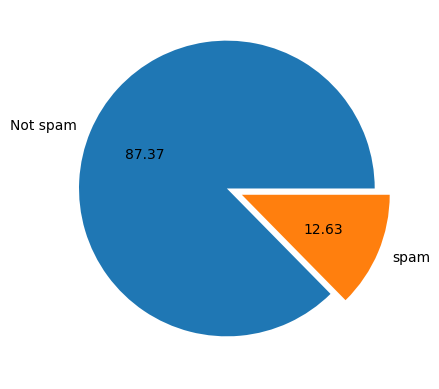

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['Not spam','spam'],autopct="%0.2f" ,explode = (0.1, 0.01) )
plt.show()

In [19]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ronak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# no of characters
df['no._of_char'] = df['message'].apply(len)
# num of words
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
# no. of sentence
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\ronak\AppData\Local\Temp\ipykernel_21476\3387258011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no._of_char'] = df['message'].apply(len)
C:\Users\ronak\AppData\Local\Temp\ipykernel_21476\3387258011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
C:\Users\ronak\AppData\Local\Temp\ipykernel_21476\3387258011.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [23]:
df.sample(5)

,target,message,no._of_char,num_words,num_sentences
2408,0,Dear where you will be when i reach there,41,9,1
3375,0,"Good afternon, my love. How are today? I hope ...",151,34,5
1844,0,Da is good good player.why he is unsold.,40,9,1
1243,0,No shoot me. I'm in the docs waiting room. :/,45,14,3
2056,0,.Please charge my mobile when you get up in mo...,52,11,1


In [24]:
df.describe()

,target,no._of_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [25]:
# not spam
df[df['target'] == 0][['no._of_char','num_words','num_sentences']].describe()

,no._of_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# spam
df[df['target'] == 1][['no._of_char','num_words','num_sentences']].describe()

,no._of_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
df_spam=df[df['target'] == 1]
df_nospam=df[df['target'] == 0]
df_spam.drop(columns=['target'],inplace=True)
df_nospam.drop(columns=['target'],inplace=True)

C:\Users\ronak\AppData\Local\Temp\ipykernel_21476\1812609189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam.drop(columns=['target'],inplace=True)
C:\Users\ronak\AppData\Local\Temp\ipykernel_21476\1812609189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nospam.drop(columns=['target'],inplace=True)


In [28]:
df_nospam.head(5)

,message,no._of_char,num_words,num_sentences
0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,Ok lar... Joking wif u oni...,29,8,2
3,U dun say so early hor... U c already then say...,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,Even my brother is not like to speak with me. ...,77,18,2


In [29]:
num_nospam=df_nospam.select_dtypes(include=np.number).columns
num_spam=df_spam.select_dtypes(include=np.number).columns

In [30]:
# for i in num_spam:
#     print(i)
#     plt.figure(figsize=(15,3))
    
#     plt.subplot(1,4,1,)
#     sns.scatterplot(df_spam[i])
#     # sns.histplot(df[i],kde=True)
#     plt.subplot(1,4,2)
#     sns.boxplot(df_spam[i])
#     plt.subplot(1,4,3)
#     sns.kdeplot(x=df_spam[i],data=df_spam)
#     plt.subplot(1,4,4)
#     sns.violinplot(df_spam[i])
     
#     plt.plot

no._of_char


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


num_words


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


num_sentences


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


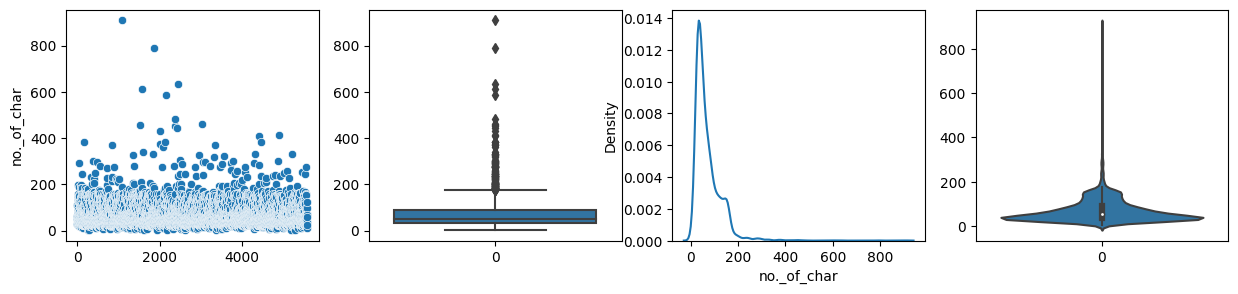

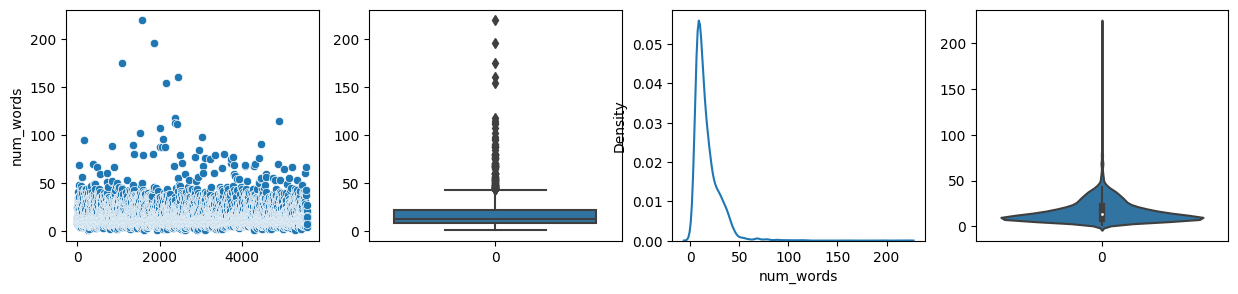

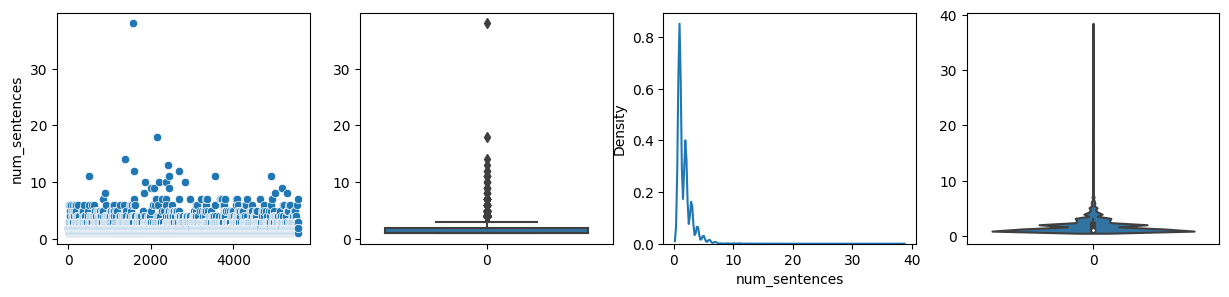

In [31]:
for i in num_nospam:
    print(i)
    plt.figure(figsize=(15,3))
    
    plt.subplot(1,4,1,)
    sns.scatterplot(df_nospam[i])
    # sns.histplot(df[i],kde=True)
    plt.subplot(1,4,2)
    sns.boxplot(df_nospam[i])
    plt.subplot(1,4,3)
    sns.kdeplot(x=df_nospam[i],data=df_nospam)
    plt.subplot(1,4,4)
    sns.violinplot(df_nospam[i])
     
    plt.plot

<Axes: >

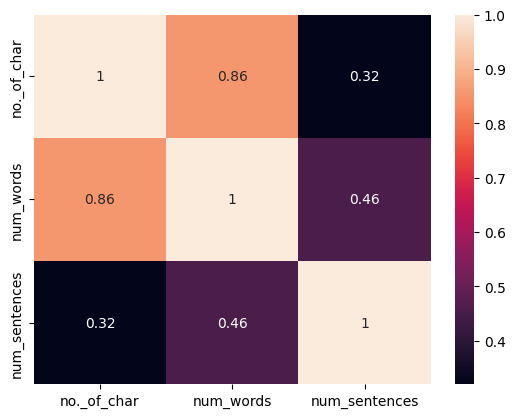

In [32]:
# for heatmap
df1=df_spam.select_dtypes(exclude=['object'])
sns.heatmap(df1.corr(),annot=True)

<Axes: >

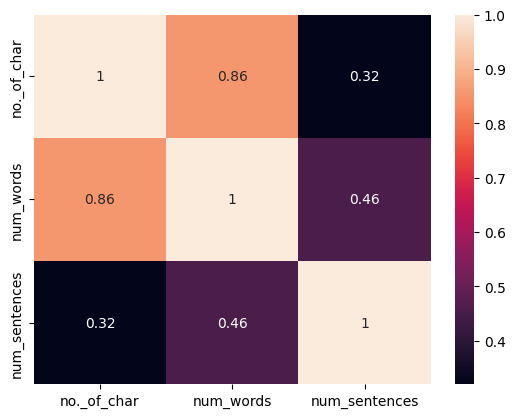

In [33]:
# for heatmap
df2=df_nospam.select_dtypes(exclude=['object'])
sns.heatmap(df1.corr(),annot=True)

# 3.Data Preprocessing
- case lowering
- remove special characters(% - _ etc)
- remove stop words(preposition) and punctuation
- stemming
- tokenization

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ronak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# Initialize the stemmer
ps = PorterStemmer()

def transform_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    
    y = []
    for i in message:
        if i.isalnum():
            y.append(i)
    
    message = y[:]
    y.clear()
    
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    message = y[:]
    y.clear()
    
    for i in message:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [36]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import PorterStemmer
# import string

# # Initialize the stemmer
# ps = PorterStemmer()

# def transform_message(message):
#     # Convert message to lowercase
#     message = message.lower()
    
#     # Tokenize the message
#     message = word_tokenize(message)
    
#     # Remove non-alphanumeric characters
#     message = [i for i in message if i.isalnum()]
    
#     # Remove stopwords and punctuation
#     stop_words = set(stopwords.words('english'))
#     message = [i for i in message if i not in stop_words and i not in string.punctuation]
    
#     # Stem the words
#     message = [ps.stem(i) for i in message]
    
#     # Join the processed words into a single string
#     return " ".join(message)

In [37]:
transform_message("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [38]:
df

,target,message,no._of_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [39]:
df['transformed_message'] = df['message'].apply(transform_message)

C:\Users\ronak\AppData\Local\Temp\ipykernel_21476\818041487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_message'] = df['message'].apply(transform_message)


In [40]:
df

,target,message,no._of_char,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [41]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
len(spam_corpus)

9939

In [42]:

# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

In [43]:

notspam_corpus = []
for msg in df[df['target'] == 0]['transformed_message'].tolist():
    for word in msg.split():
        notspam_corpus.append(word)
len(notspam_corpus)

35404

In [44]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [45]:
X = tfidf.fit_transform(df['transformed_message']).toarray()

In [46]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:

y = df['target'].values

In [48]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
import pickle
# save the model to a file
filename='Spam_message.pkl'
with open(filename,'wb') as file:
    pickle.dump(mnb,file)

In [ ]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))